In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#pre trained vector instead of all of the words t5,bert based word embeddings 

# load data
tweets= pd.read_csv('https://raw.githubusercontent.com/jpc45/Amazon/main/dataset1.csv')
y_use= tweets.iloc[:, 13].values #ground truth of train



tweets = tweets.drop(columns = ['Unnamed: 14'])
presence = tweets[(tweets['Presence/Absence'] == 1)]
extra_sample = presence.sample(n=28, random_state =1234)
tweets = tweets.append(extra_sample)
y_use= tweets.iloc[:, 13].values #ground truth of train
tweets.head()


,Org name,Org type,Forbes rank,CSR rank,Sector,Text,tweet_type,CODED_hashtags,CODED_media,CODED_urls,favorite_count,retweet_count,Date,Presence/Absence
0,United Parcel Service,profit,41,60,Transportation,"@GreenSolarWind Lon, on #WorldEnvironmentDay, ...",original,1,1,1,1,0,6/5/19,1
1,United Parcel Service,profit,41,60,Transportation,"@joelgehman Joel, It‚Äôs #WorldEnvironmentDay...",original,1,1,1,0,0,6/5/19,1
2,United Parcel Service,profit,41,60,Transportation,"@NelsonSwitzer Nelson, today is #WorldEnvironm...",original,1,1,1,0,1,6/5/19,0
3,United Parcel Service,profit,41,60,Transportation,@hdbyrne Today is #WorldEnvironmentDay! The th...,original,1,1,1,1,0,6/5/19,0
4,United Parcel Service,profit,41,60,Transportation,"@JohnRSeydel On #WorldEnvironmentDay, UPS cont...",original,1,1,1,1,0,6/5/19,1


In [ ]:
%matplotlib inline
import seaborn as sns

##Exploratory Analysis

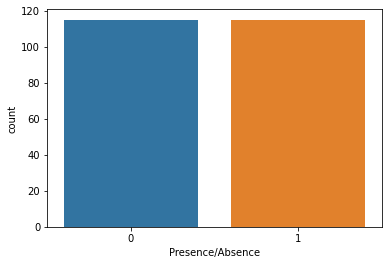

In [ ]:
# the number of positive, negative and neutral reviews
sns.countplot(x='Presence/Absence', data=tweets)

[Text(0, 0, 'Transportation'),
 Text(0, 0, 'Household Products'),
 Text(0, 0, 'Financials'),
 Text(0, 0, 'Energy'),
 Text(0, 0, 'Motor Vehicles & Parts'),
 Text(0, 0, 'Health Care'),
 Text(0, 0, 'Technology'),
 Text(0, 0, 'Engineering & Construction'),
 Text(0, 0, 'Materials'),
 Text(0, 0, 'Apparel'),
 Text(0, 0, 'Business Services'),
 Text(0, 0, 'Wholesalers'),
 Text(0, 0, 'Aerospace & Defense'),
 Text(0, 0, 'Retailing'),
 Text(0, 0, 'Hotels, Restaurants & Leisure'),
 Text(0, 0, 'Food, Beverages & Tobacco'),
 Text(0, 0, 'Healthcare'),
 Text(0, 0, 'Industrials'),
 Text(0, 0, 'Medical Products and Equipment'),
 Text(0, 0, 'Wholesalers: Electronics and Office Equipment'),
 Text(0, 0, 'Telecommunications'),
 Text(0, 0, 'Media')]

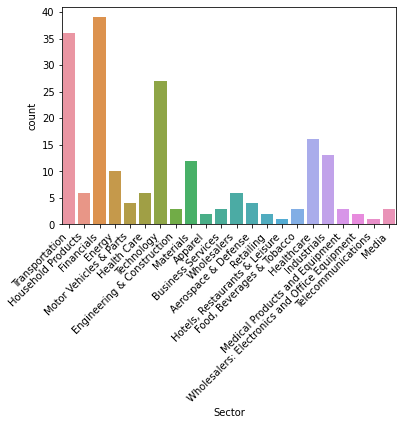

In [ ]:
plot=sns.countplot(x='Sector', data=tweets)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Transportation'),
 Text(0, 0, 'Household Products'),
 Text(0, 0, 'Financials'),
 Text(0, 0, 'Energy'),
 Text(0, 0, 'Motor Vehicles & Parts'),
 Text(0, 0, 'Health Care'),
 Text(0, 0, 'Technology'),
 Text(0, 0, 'Engineering & Construction'),
 Text(0, 0, 'Materials'),
 Text(0, 0, 'Apparel'),
 Text(0, 0, 'Business Services'),
 Text(0, 0, 'Wholesalers'),
 Text(0, 0, 'Aerospace & Defense'),
 Text(0, 0, 'Retailing'),
 Text(0, 0, 'Hotels, Restaurants & Leisure'),
 Text(0, 0, 'Food, Beverages & Tobacco'),
 Text(0, 0, 'Healthcare'),
 Text(0, 0, 'Industrials'),
 Text(0, 0, 'Medical Products and Equipment'),
 Text(0, 0, 'Wholesalers: Electronics and Office Equipment'),
 Text(0, 0, 'Telecommunications'),
 Text(0, 0, 'Media')]

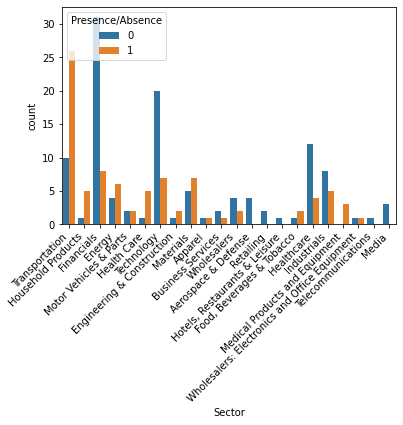

In [ ]:
plot=sns.countplot(x='Sector', hue='Presence/Absence', data=tweets)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
tweets = tweets.drop(columns = ['Presence/Absence'])
tweets.head()

,Org name,Org type,Forbes rank,CSR rank,Sector,Text,tweet_type,CODED_hashtags,CODED_media,CODED_urls,favorite_count,retweet_count,Date
0,United Parcel Service,profit,41,60,Transportation,"@GreenSolarWind Lon, on #WorldEnvironmentDay, ...",original,1,1,1,1,0,6/5/19
1,United Parcel Service,profit,41,60,Transportation,"@joelgehman Joel, It‚Äôs #WorldEnvironmentDay...",original,1,1,1,0,0,6/5/19
2,United Parcel Service,profit,41,60,Transportation,"@NelsonSwitzer Nelson, today is #WorldEnvironm...",original,1,1,1,0,1,6/5/19
3,United Parcel Service,profit,41,60,Transportation,@hdbyrne Today is #WorldEnvironmentDay! The th...,original,1,1,1,1,0,6/5/19
4,United Parcel Service,profit,41,60,Transportation,"@JohnRSeydel On #WorldEnvironmentDay, UPS cont...",original,1,1,1,1,0,6/5/19


In [ ]:
X_use = tweets.iloc[:, 5].values 
#y= tweets.iloc[:, 12].values

print(X_use[0:5])

['@GreenSolarWind Lon, on #WorldEnvironmentDay, UPS continues work on its #sustainability goals. We recently made the largest purchase of RNG ever, reducing our #GHG emissions by more than 1M metric tons. Subscribe to our newsletter to learn more: https://t.co/oEtJZOrxKp https://t.co/ilQGCcD5Hm'
 '@joelgehman  Joel, It‚Äôs #WorldEnvironmentDay. Did you know UPS recently made the largest purchase of RNG ever from CleanEnergy to help combat emissions? UPS‚Äôs #sustainability newsletter highlights this initiative. You can subscribe here: https://t.co/oEtJZOrxKp https://t.co/xYSq5VGA15'
 '@NelsonSwitzer Nelson, today is #WorldEnvironmentDay! The theme this year is air pollution. Find out how UPS continues to work on its sustainability goals by subscribing to our newsletter. https://t.co/oEtJZOrxKp https://t.co/kQNGASqn9O'
 '@hdbyrne Today is #WorldEnvironmentDay! The theme this year is air pollution. Find out how UPS continues to work on its sustainability goals by subscribing to our newsl

In [ ]:
print(y_use[0:5])
print(len(X_use))
print(len(y_use))

[1 1 0 0 1]
230
230


#pre processing

In [ ]:
import re
processed_tweets = []

# remove special characters and empty spaces in order to have a clean dataset
for tweet in range(0, len(X_use)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X_use[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [ ]:
print(processed_tweets[0:5])

[' greensolarwind lon on worldenvironmentday ups continues work on its sustainability goals we recently made the largest purchase of rng ever reducing our ghg emissions by more than 1m metric tons subscribe to our newsletter to learn more https co oetjzorxkp https co ilqgccd5hm', ' joelgehman joel it äôs worldenvironmentday did you know ups recently made the largest purchase of rng ever from cleanenergy to help combat emissions ups äôs sustainability newsletter highlights this initiative you can subscribe here https co oetjzorxkp https co xysq5vga15', ' nelsonswitzer nelson today is worldenvironmentday the theme this year is air pollution find out how ups continues to work on its sustainability goals by subscribing to our newsletter https co oetjzorxkp https co kqngasqn9o', ' hdbyrne today is worldenvironmentday the theme this year is air pollution find out how ups continues to work on its sustainability goals by subscribing to our newsletter https co oetjzorxkp https co 7nxef8cpxc', '

currently, the processed_tweets stll in sentence format. We need to convert it to TF-IDF before we can apply classifiers such as SVM and Random Forest. We will use sklearn.feature_extraction.text.TfidfVectorizer to convert the texts to TF-IDF format. Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html for more details.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
print(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
## TF-IDF Scheme for Text to Numeric Feature Generation, please refer to 
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=1200, min_df=5, max_df=0.7, stop_words=stopwords)  
X_first_model = tfidfconverter.fit_transform(processed_tweets).toarray()

In [ ]:
print(X_first_model[0:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from numpy import std
from sklearn.metrics import f1_score
cv= LeaveOneOut()
model=RandomForestClassifier()
scores= cross_val_score(model, X_first_model, y_use, scoring='accuracy',
                         cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

NameError: ignored

In [ ]:
from numpy import mean
from numpy import absolute
from numpy import sqrt
sqrt(mean(absolute(scores)))

0.9184107255849995

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_use, ).ravel()

In [ ]:
## Dividing Data to Training and Test Sets, with 20% as the test set #change to x firsty model

X_train, X_test, y_train, y_test = train_test_split(X_first_model, y_use, test_size=0.2, random_state=0)

## forest

In [ ]:
# the classifier of randomforest

classifier_RandomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=0)  
classifier_RandomForestClassifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# make predictions on the test set
predictions_RandomForestClassifier = classifier_RandomForestClassifier.predict(X_test)
print(predictions_RandomForestClassifier)

[0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 0 1 1]


In [ ]:
print(accuracy_score(y_test, predictions_RandomForestClassifier))


0.8913043478260869


##Perceptron

In [ ]:
# the classifier of # Multi-layer Perceptron classifier, simple version of neural networks
from sklearn.neural_network import MLPClassifier
classifier_MLPClassifier = MLPClassifier(alpha=1, max_iter=10)
classifier_MLPClassifier.fit(X_train, y_train)
predictions_MLPClassifier = classifier_MLPClassifier.predict(X_test)
print(accuracy_score(y_test, predictions_MLPClassifier))

0.3695652173913043


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##svm

In [ ]:
from sklearn.svm import SVC
classifier_SVC = SVC(kernel="linear", C=0.025, max_iter=200)
classifier_SVC.fit(X_train, y_train)
predictions_SVC = classifier_SVC.predict(X_test)
print(accuracy_score(y_test, predictions_SVC))

0.3695652173913043


##bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier_MNB = MultinomialNB()
classifier_MNB.fit(X_train, y_train)
predictions_MNB = classifier_MNB.predict(X_test)
print(accuracy_score(y_test, predictions_MNB))

0.7391304347826086


##xgb

In [ ]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)
predictions_XGB = classifier_XGB.predict(X_test)
print(predictions_XGB)

print(accuracy_score(y_test,predictions_XGB))

[0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1
 1 1 0 0 1 0 0 1 0]
0.7391304347826086


attempting to use large dataset

##Now using entire 200 labeled as train and testing on unlabeled random 200 row sample...

In [ ]:
#tweets= pd.read_csv('https://raw.githubusercontent.com/jpc45/Amazon/main/dataset1.csv')
#tweets.head()

now for test data

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive/")
#%cd '/content/drive/My Drive/Colab Notebooks/capstone'

test_data = pd.read_csv('https://raw.githubusercontent.com/jpc45/Amazon/main/environmental%20tweets.csv')
test_data = test_data.drop(columns = ['Unnamed: 13'])
# read the data
print('Loading data ...')
#test_data = pd.read_csv('environmental tweets.csv')
print('Done!')
test_data


Loading data ...
Done!


,Org name,Org type,Forbes rank,CSR rank,Sector,Text,tweet_type,CODED_hashtags,CODED_media,CODED_urls,favorite_count,retweet_count,Date
0,CVS Health,profit,8,59.0,Healthcare,Barbershops are already the unofficial social ...,original,1,1,1,10,2,12/31/19
1,CVS Health,profit,8,59.0,Healthcare,We‚Äôre honored to be recognized in the @HACRO...,original,1,1,0,2,1,12/20/19
2,CVS Health,profit,8,59.0,Healthcare,"In #Nashville, we sat down with the folks behi...",original,1,1,1,9,9,12/19/19
3,CVS Health,profit,8,59.0,Healthcare,A grant from @Aetna Better Health of #WestVirg...,original,1,0,1,4,1,12/18/19
4,CVS Health,profit,8,59.0,Healthcare,"Mercy Care, an @Aetna-managed Medicaid program...",original,0,0,1,1,1,12/17/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52790,General Dynamics,profit,92,51.0,Aerospace & Defense,Attending #NSBE45 in Detroit next week? So are...,original,1,1,1,20,3,3/21/19
52791,General Dynamics,profit,92,51.0,Aerospace & Defense,Now that‚Äôs a cover photo ‚Äì @NatGeoMag repo...,original,1,1,1,23,6,3/11/19
52792,General Dynamics,profit,92,51.0,Aerospace & Defense,The agenda for #DC19Denver has been released ‚...,original,1,0,1,12,5,1/30/19
52793,General Dynamics,profit,92,51.0,Aerospace & Defense,"Scalable for any mission. Collect, analyze and...",original,0,1,1,13,3,1/30/19


In [ ]:
#tweets


In [ ]:
test_data.head()

,Org name,Org type,Forbes rank,CSR rank,Sector,Text,tweet_type,CODED_hashtags,CODED_media,CODED_urls,favorite_count,retweet_count,Date
0,CVS Health,profit,8,59.0,Healthcare,Barbershops are already the unofficial social ...,original,1,1,1,10,2,12/31/19
1,CVS Health,profit,8,59.0,Healthcare,We‚Äôre honored to be recognized in the @HACRO...,original,1,1,0,2,1,12/20/19
2,CVS Health,profit,8,59.0,Healthcare,"In #Nashville, we sat down with the folks behi...",original,1,1,1,9,9,12/19/19
3,CVS Health,profit,8,59.0,Healthcare,A grant from @Aetna Better Health of #WestVirg...,original,1,0,1,4,1,12/18/19
4,CVS Health,profit,8,59.0,Healthcare,"Mercy Care, an @Aetna-managed Medicaid program...",original,0,0,1,1,1,12/17/19


In [ ]:
unlb_tweet_samp = test_data.sample(n=230,random_state=0) #same as labeled
unlb_tweet_samp.head()

,Org name,Org type,Forbes rank,CSR rank,Sector,Text,tweet_type,CODED_hashtags,CODED_media,CODED_urls,favorite_count,retweet_count,Date
12721,Duke Energy,profit,126,54.0,Energy,Rush hour commutes are the stuff of nightmares...,original,0,0,1,8,1,9/24/19
8863,Rite Aid,profit,107,44.0,Food & Drug Stores,"This holiday season, Rite Aid is FULL of Thank...",original,0,1,0,3,2,11/20/19
49391,Goldman Sachs Group,profit,62,55.0,Financials,Nearly half of all American smartphone users a...,original,0,1,1,29,9,11/29/19
48643,Lockheed Martin,profit,60,59.0,Aerospace & Defense,Quantum tech could be the key to solving the #...,original,1,1,1,70,16,4/22/19
15504,Lennar,profit,154,44.0,Engineering & Construction,Would there be a smile on your child's FACE if...,original,1,1,1,4,2,10/6/19


In [ ]:
X_test_unlb= unlb_tweet_samp.iloc[:, 5].values 
print(X_test_unlb[0:5])

["Rush hour commutes are the stuff of nightmares, clogged highways, car exhaust, blaring horns. There has to be a better way. That's why we're testing an electric vehicle vanpool, w/ the goal of reducing the amount of gasoline-powered vehicles on the road. https://t.co/XmNDtneMGh"
 'This holiday season, Rite Aid is FULL of Thanks for KidCents charity @EQUIKIDS in Virginia Beach, VA for providing, promoting and supporting equine-assisted activities for individuals with mental, physical, social or learning disabilities. https://t.co/41QOGyjim2'
 'Nearly half of all American smartphone users are gamers. $GS Research explains how mobile is driving the video game industry to new heights: https://t.co/wGlvcBbiZr https://t.co/HmGj3oyEEZ'
 'Quantum tech could be the key to solving the #energy crisis. Explore how quantum can change the world:  https://t.co/SiYtsmOs6N #EarthDay2019 https://t.co/X9b4Snq6Tz'
 "Would there be a smile on your child's FACE if they had this SPACE?! #childrensroom #hom

In [ ]:
#y_test_unlb= unlb_tweet_samp.iloc[:, 13].values

#print(y_test_unlb[0:5])
print(len(X_test_unlb))
#print(len(y))

230


In [ ]:

#print(X_test)
import re
processed_tweets2 = []

# remove special characters and empty spaces in order to have a clean dataset
for tweet in range(0, len(X_test_unlb)):  
    # Remove all the special characters
    processed_tweet2 = re.sub(r'\W', ' ', str(X_test_unlb[tweet]))
 
    # remove all single characters
    processed_tweet2 = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet2)
 
    # Remove single characters from the start
    processed_tweet2 = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet2) 
 
    # Substituting multiple spaces with single space
    processed_tweet2= re.sub(r'\s+', ' ', processed_tweet2, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet2 = re.sub(r'^b\s+', '', processed_tweet2)
 
    # Converting to Lowercase
    processed_tweet2 = processed_tweet2.lower()
 
    processed_tweets2.append(processed_tweet2)

In [ ]:

comb_text = processed_tweets+processed_tweets2
print(comb_text[0:4])
len(comb_text)

[' greensolarwind lon on worldenvironmentday ups continues work on its sustainability goals we recently made the largest purchase of rng ever reducing our ghg emissions by more than 1m metric tons subscribe to our newsletter to learn more https co oetjzorxkp https co ilqgccd5hm', ' joelgehman joel it äôs worldenvironmentday did you know ups recently made the largest purchase of rng ever from cleanenergy to help combat emissions ups äôs sustainability newsletter highlights this initiative you can subscribe here https co oetjzorxkp https co xysq5vga15', ' nelsonswitzer nelson today is worldenvironmentday the theme this year is air pollution find out how ups continues to work on its sustainability goals by subscribing to our newsletter https co oetjzorxkp https co kqngasqn9o', ' hdbyrne today is worldenvironmentday the theme this year is air pollution find out how ups continues to work on its sustainability goals by subscribing to our newsletter https co oetjzorxkp https co 7nxef8cpxc']


460

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(comb_text,max_features=1200, min_df=5, max_df=0.7 ,stop_words=stopwords)  
comb_feat= tfidfconverter.fit_transform(comb_text).toarray()

In [ ]:
print(comb_feat)
type(comb_feat)
train_test_split=np.split(comb_feat,2)
train=train_test_split[0]

test=train_test_split[1]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(xxxx[0:6])

In [ ]:
#forest
classifier_RandomForestClassifier = RandomForestClassifier(random_state=0)  
classifier_RandomForestClassifier.fit(train,y_use)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictions_RandomForestClassifier = classifier_RandomForestClassifier.predict(test)
print(predictions_RandomForestClassifier)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [ ]:
unlb_tweet_samp['Pres/Abs Preds'] = predictions_RandomForestClassifier.tolist()

unlb_tweet_samp.head()

,Org name,Org type,Forbes rank,CSR rank,Sector,Text,tweet_type,CODED_hashtags,CODED_media,CODED_urls,favorite_count,retweet_count,Date,Pres/Abs Preds
12721,Duke Energy,profit,126,54.0,Energy,Rush hour commutes are the stuff of nightmares...,original,0,0,1,8,1,9/24/19,0
8863,Rite Aid,profit,107,44.0,Food & Drug Stores,"This holiday season, Rite Aid is FULL of Thank...",original,0,1,0,3,2,11/20/19,0
49391,Goldman Sachs Group,profit,62,55.0,Financials,Nearly half of all American smartphone users a...,original,0,1,1,29,9,11/29/19,0
48643,Lockheed Martin,profit,60,59.0,Aerospace & Defense,Quantum tech could be the key to solving the #...,original,1,1,1,70,16,4/22/19,0
15504,Lennar,profit,154,44.0,Engineering & Construction,Would there be a smile on your child's FACE if...,original,1,1,1,4,2,10/6/19,0
